#Etude des données

In [59]:
df_vente = df_filtered[df_filtered['Nature mutation'] == 'Vente'].copy()
df_vente.columns
#df_vente['sum_carrez']=float(df_vente['Surface Carrez du 1er lot'])+float(df_vente['Surface Carrez du 2eme lot'])+float(df_vente['Surface Carrez du 3eme lot'])+float(df_vente['Surface Carrez du 4eme lot'])+float(df_vente['Surface Carrez du 5eme lot'])
# df_vente[df_vente['Surface Carrez du 1er lot'].notna()]
df_vente.head()
df_vente[df_vente['Surface Carrez du 1er lot'].notna()]

# Fonction pour nettoyer et convertir les chaînes en float
def convert_to_float(value):
    if pd.isna(value):
        return 0.
    return float(value.replace(',', '.'))
# Appliquer la fonction de conversion à la colonne
df_vente['Surface Carrez du 1er lot'] = df_vente['Surface Carrez du 1er lot'].apply(convert_to_float)
df_vente['Surface Carrez du 2eme lot'] = df_vente['Surface Carrez du 2eme lot'].apply(convert_to_float)
df_vente['Surface Carrez du 3eme lot'] = df_vente['Surface Carrez du 3eme lot'].apply(convert_to_float)
df_vente['Surface Carrez du 4eme lot'] = df_vente['Surface Carrez du 4eme lot'].apply(convert_to_float)
df_vente['Surface Carrez du 5eme lot'] = df_vente['Surface Carrez du 5eme lot'].apply(convert_to_float)
df_vente[df_vente['Surface Carrez du 1er lot'].notna()]

df_vente['sum_carrez']=df_vente['Surface Carrez du 1er lot']\
                        + df_vente['Surface Carrez du 2eme lot']\
                        +df_vente['Surface Carrez du 3eme lot']\
                        +df_vente['Surface Carrez du 4eme lot']\
                        +df_vente['Surface Carrez du 5eme lot']

df_filtered_2=df_vente[['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'Type de voie', 'Code postal', 'Nombre de lots',  'sum_carrez',
       'Code type local', 'Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain']]

df_filtered_2.isna().sum()

No disposition                     0
Date mutation                      0
Nature mutation                    0
Valeur fonciere                    0
Type de voie                 1375213
Code postal                     1509
Nombre de lots                     0
sum_carrez                         0
Code type local              1343847
Surface reelle bati          1346094
Nombre pieces principales    1346094
Surface terrain               988410
dtype: int64

In [30]:
# importing pandas
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("raw_data/valeursfoncieres-2023.txt", sep="|").copy()


# Sélectionner les colonnes d'intérêt
cols = ['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
        'Type de voie', 'Code postal', 'Surface Carrez du 1er lot',
        'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot',
         'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot',
        'Nombre de lots', 'Code type local', 'Surface reelle bati',
        'Nombre pieces principales', 'Surface terrain']
df = df[cols]

#Suppression desn lignes qui n'ont pas de Valeur fonciere ou de code postal
df.dropna(subset=['Valeur fonciere','Code postal'],inplace=True)
#Recuperation des valeur qui concerne que les Vente 'classiques'
df=df[df['Nature mutation'] == 'Vente']


# Fonction pour nettoyer et convertir les chaînes en float
def convert_to_float(value):
    if pd.isna(value):
        return 0.
    #return float(value.replace(',', '.'))

# Appliquer la fonction de conversion à la colonne
carrez_cols = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot',
               'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot',
               'Surface Carrez du 5eme lot']



for col in carrez_cols:
    df[col] = df[col].apply(convert_to_float)

df['Somme surface carrez']= df[carrez_cols].sum(axis=1)

# Supprimer les colonnes contenant les surfaces carrez
df.drop(columns=carrez_cols, inplace=True)

#Conversion des valeurs fonciere en float
df['Valeur fonciere']=df['Valeur fonciere'].apply(convert_to_float)


/tmp/ipykernel_4273/13405349.py:5: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("raw_data/valeursfoncieres-2023.txt", sep="|").copy()


In [31]:
df.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code postal,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Somme surface carrez
0,1,05/01/2023,Vente,None,ALL,1630.0,1,3.0,0.0,0.0,NaN,0.0
1,1,05/01/2023,Vente,None,ALL,1630.0,1,3.0,0.0,0.0,NaN,0.0
2,1,05/01/2023,Vente,None,ALL,1630.0,1,2.0,233.0,8.0,NaN,0.0
3,1,03/01/2023,Vente,None,RTE,1450.0,0,1.0,64.0,3.0,988.0,0.0
4,1,05/01/2023,Vente,None,CHE,1800.0,0,1.0,73.0,3.0,835.0,0.0
5,1,05/01/2023,Vente,None,CHE,1800.0,0,3.0,0.0,0.0,835.0,0.0
6,1,05/01/2023,Vente,None,CHE,1800.0,0,3.0,0.0,0.0,835.0,0.0
7,1,03/01/2023,Vente,None,RUE,1210.0,0,1.0,136.0,7.0,921.0,0.0
8,1,06/01/2023,Vente,None,NaN,1480.0,0,NaN,NaN,NaN,17050.0,0.0
13,3,06/01/2023,Vente,None,NaN,1340.0,0,NaN,NaN,NaN,63.0,0.0


In [1]:
# importing pandas
import pandas as pd
# Définir la taille des morceaux (par exemple 100 000 lignes par chunk)
chunksize = 100000

# Liste pour stocker les DataFrames traités
dfs = []

# Lire le fichier en morceaux
for chunk in pd.read_csv("raw_data/valeursfoncieres-2023.txt", sep="|", chunksize=chunksize,dtype=str):

    # Sélectionner les colonnes d'intérêt
    cols = ['Date mutation', 'Nature mutation', 'Valeur fonciere',
            'Type de voie', 'Code postal', 'Surface Carrez du 1er lot',
            'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot',
            'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot',
            'Nombre de lots', 'Code type local', 'Surface reelle bati',
            'Nombre pieces principales', 'Surface terrain']

    chunk = chunk[cols]  # Sélectionner les colonnes

    # Suppression des lignes qui n'ont pas de 'Valeur fonciere' ou de 'Code postal'
    chunk.dropna(subset=['Valeur fonciere', 'Code postal'], inplace=True)

    # Filtrer pour ne garder que les 'Vente' classiques
    chunk = chunk[chunk['Nature mutation'] == 'Vente']
    chunk['Date mutation'] = pd.to_datetime(chunk['Date mutation'],format='%d/%m/%Y')
    # Colonnes Carrez à traiter
    carrez_cols = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot',
                   'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot',
                   'Surface Carrez du 5eme lot']



    # Remplacer les virgules par des points dans les colonnes numériques
    chunk['Valeur fonciere'] = chunk['Valeur fonciere'].str.replace(',', '.').astype(float)
    chunk[carrez_cols] = chunk[carrez_cols].apply(lambda col: col.str.replace(',', '.').astype(float))
        # Remplacer les NaN dans les colonnes Carrez par 0
    chunk[carrmalika.eldaz67@gmail.comez_cols] = chunk[carrez_cols].fillna(0)
    chunk['somme surface carrez']=chunk[carrez_cols].sum(axis=1)
    # Supprimer les colonnes contenant les surfaces carrez
    chunk.drop(columns=carrez_cols, inplace=True)
    chunk[['Surface reelle bati','Nombre pieces principales','Surface terrain']]=chunk[['Surface reelle bati','Nombre pieces principales','Surface terrain']].fillna(0).astype(float)
    chunk[['Nombre de lots','Code type local']]=chunk[['Nombre de lots','Code type local']].fillna(0).astype(int)

    # Ajouter le chunk traité à la liste
    dfs.append(chunk)

# Combiner tous les DataFrames traités
df_final = pd.concat(dfs, ignore_index=True)

# Afficher les premières lignes pour vérifier
df_final.head(10)


,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code postal,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,somme surface carrez
0,2023-01-05,Vente,1070000.0,ALL,1630,1,3,0.0,0.0,0.0,0.0
1,2023-01-05,Vente,1070000.0,ALL,1630,1,3,0.0,0.0,0.0,0.0
2,2023-01-05,Vente,1070000.0,ALL,1630,1,2,233.0,8.0,0.0,0.0
3,2023-01-03,Vente,152200.0,RTE,1450,0,1,64.0,3.0,988.0,0.0
4,2023-01-05,Vente,269000.0,CHE,1800,0,1,73.0,3.0,835.0,0.0
5,2023-01-05,Vente,269000.0,CHE,1800,0,3,0.0,0.0,835.0,0.0
6,2023-01-05,Vente,269000.0,CHE,1800,0,3,0.0,0.0,835.0,0.0
7,2023-01-03,Vente,770000.0,RUE,1210,0,1,136.0,7.0,921.0,0.0
8,2023-01-06,Vente,6820.0,NaN,1480,0,0,0.0,0.0,17050.0,0.0
9,2023-01-06,Vente,85520.0,NaN,1340,0,0,0.0,0.0,63.0,0.0


In [37]:

df_final.dtypes

No disposition                        int64
Date mutation                datetime64[ns]
Nature mutation                      object
Valeur fonciere                     float64
Type de voie                         object
Code postal                         float64
Nombre de lots                        int64
Code type local                     float64
Surface reelle bati                 float64
Nombre pieces principales           float64
Surface terrain                     float64
somme surface carrez                float64
dtype: object

Nombre de lots              -0.017273
Nombre pieces principales    0.008574
Surface reelle bati          0.039248
Surface terrain              0.044096
somme surface carrez         0.055646
Code type local              0.073400
Code postal                  0.081473
Valeur fonciere              1.000000
Name: Valeur fonciere, dtype: float64

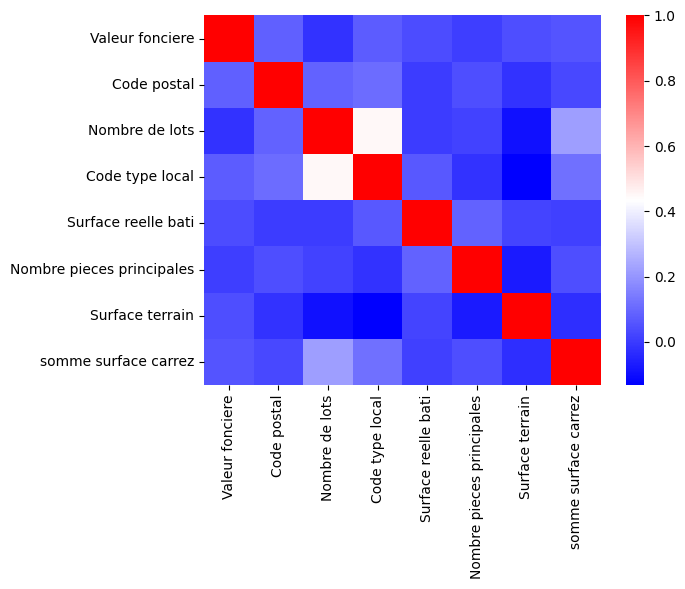

In [9]:
import seaborn as sns


df_corr=df_final[['Valeur fonciere', 'Code postal','Nombre de lots','Code type local','Surface reelle bati','Nombre pieces principales','Surface terrain','somme surface carrez']]
# Heatmap of pairwise correlations
correlation_matrix = df_corr.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr")
correlation_matrix['Valeur fonciere'].sort_values()

In [34]:
import pandas as pd

# Définir le nombre de lignes à lire
nrows = 100000

# Lire les premières 100 000 lignes du fichier
chunk = pd.read_csv("raw_data/valeursfoncieres-2023.txt", sep="|", nrows=nrows, dtype=str)

# Liste des colonnes d'intérêt
cols = ['Date mutation', 'Nature mutation', 'Valeur fonciere',
        'Type de voie', 'Code postal', 'Surface Carrez du 1er lot',
        'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot',
        'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot',
        'Nombre de lots', 'Code type local', 'Surface reelle bati',
        'Nombre pieces principales', 'Surface terrain']

chunk = chunk[cols]  # Sélectionner les colonnes

# Suppression des lignes qui n'ont pas de 'Valeur fonciere' ou de 'Code postal'
chunk.dropna(subset=['Valeur fonciere', 'Code postal'], inplace=True)

# Filtrer pour ne garder que les 'Vente' classiques
chunk = chunk[chunk['Nature mutation'] == 'Vente']
chunk = chunk[(chunk['Code type local'] == '1') | (chunk['Code type local'] == '2')]
chunk['Date mutation'] = pd.to_datetime(chunk['Date mutation'], format='%d/%m/%Y')

# Colonnes Carrez à traiter
carrez_cols = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot',
               'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot',
               'Surface Carrez du 5eme lot']

# Remplacer les virgules par des points dans les colonnes numériques
chunk['Valeur fonciere'] = chunk['Valeur fonciere'].str.replace(',', '.').astype(float)
chunk[carrez_cols] = chunk[carrez_cols].apply(lambda col: col.str.replace(',', '.').astype(float))

# Remplacer les NaN dans les colonnes Carrez par 0
chunk[carrez_cols] = chunk[carrez_cols].fillna(0)
chunk['somme surface carrez'] = chunk[carrez_cols].sum(axis=1)

# Supprimer les colonnes contenant les surfaces carrez
chunk.drop(columns=carrez_cols, inplace=True)
chunk[['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']] = chunk[['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']].fillna(0).astype(float)
chunk[['Nombre de lots', 'Code type local']] = chunk[['Nombre de lots', 'Code type local']].fillna(0).astype(int)
# Filtrer pour enlever les lignes où 'Nombre de lots', 'Surface reelle bati', ou 'somme surface carrez' sont égales à 0
chunk = chunk[(chunk['Nombre de lots'] != 0) |
              (chunk['Surface reelle bati'] != 0) |
              (chunk['somme surface carrez'] != 0)]
# Ajouter un zéro à la fin des codes postaux qui ont moins de 5 caractères
chunk['Code postal'] = chunk['Code postal'].astype(str).apply(lambda x: x + '0' * (5 - len(x)) if len(x) < 5 else x)

# Afficher les premières lignes pour vérifier

def clean_column_names(df):
    # Remplacer les majuscules par des minuscules et les espaces par des underscores
    df.columns = df.columns.str.lower().str.replace(' ', '_')

clean_column_names(chunk)
chunk.head(20)

,date_mutation,nature_mutation,valeur_fonciere,type_de_voie,code_postal,nombre_de_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,somme_surface_carrez
2,2023-01-05,Vente,1070000.0,ALL,16300,1,2,233.0,8.0,0.0,0.00
3,2023-01-03,Vente,152200.0,RTE,14500,0,1,64.0,3.0,988.0,0.00
4,2023-01-05,Vente,269000.0,CHE,18000,0,1,73.0,3.0,835.0,0.00
7,2023-01-03,Vente,770000.0,RUE,12100,0,1,136.0,7.0,921.0,0.00
14,2023-01-06,Vente,85520.0,CHE,13400,0,1,160.0,5.0,0.0,0.00
16,2023-01-04,Vente,335000.0,RUE,11300,0,1,106.0,6.0,1500.0,0.00
17,2023-01-04,Vente,335000.0,RUE,11300,0,1,106.0,6.0,778.0,0.00
20,2023-01-04,Vente,209000.0,AV,10000,2,2,68.0,3.0,0.0,0.00
22,2023-01-03,Vente,325000.0,NaN,11400,0,1,70.0,4.0,403.0,0.00
29,2023-01-04,Vente,430000.0,CHE,11600,0,2,51.0,2.0,89.0,0.00


Nombre de lots              -0.017273
Nombre pieces principales    0.008574
Surface reelle bati          0.039248
Surface terrain              0.044096
somme surface carrez         0.055646
Code type local              0.073400
Code postal                  0.081473
Valeur fonciere              1.000000
Name: Valeur fonciere, dtype: float64

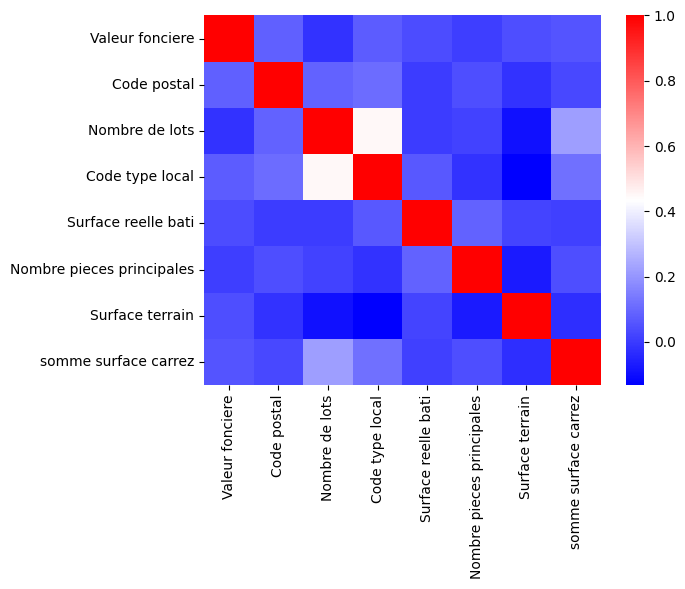

In [33]:
import seaborn as sns


df_corr=df_final[['Valeur fonciere', 'Code postal','Nombre de lots','Code type local','Surface reelle bati','Nombre pieces principales','Surface terrain','somme surface carrez']]
# Heatmap of pairwise correlations
correlation_matrix = df_corr.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr")
correlation_matrix['Valeur fonciere'].sort_values()

In [30]:
# 1 : maison ; 2 : appartement ;
#vire nb de lot, surface bati, somme surface carrez =0
chunk.shape

(24749, 11)

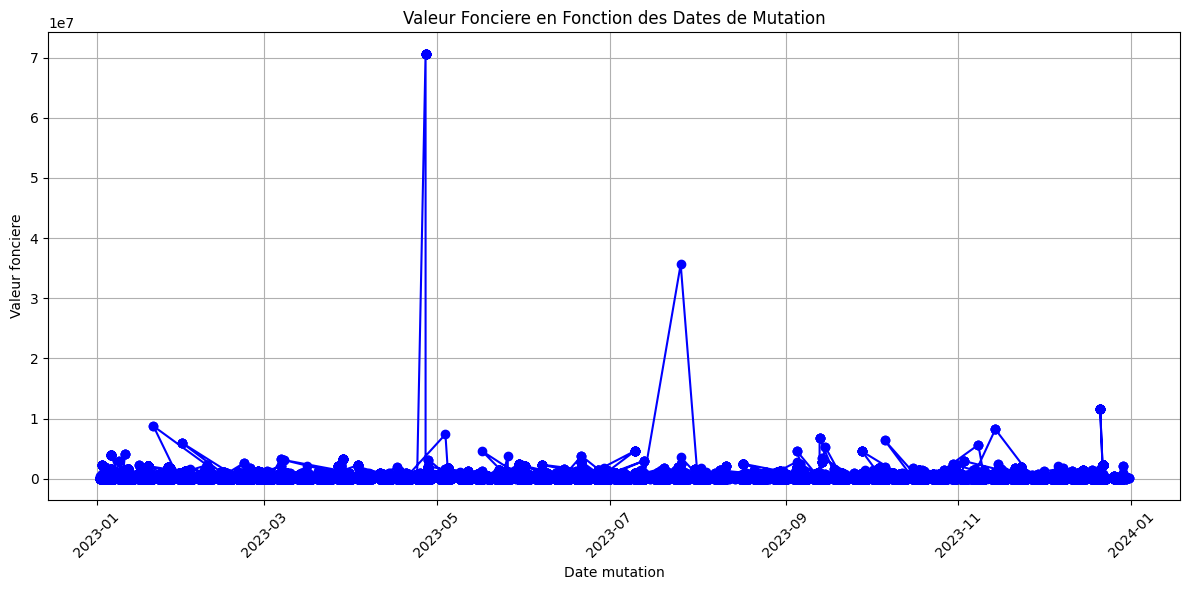

In [13]:
import matplotlib.pyplot as plt

# Tracer la valeur foncière en fonction des dates
plt.figure(figsize=(12, 6))
plt.plot(chunk['Date mutation'], chunk['Valeur fonciere'], marker='o', linestyle='-', color='b')
plt.xlabel('Date mutation')
plt.ylabel('Valeur fonciere')
plt.title('Valeur Fonciere en Fonction des Dates de Mutation')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

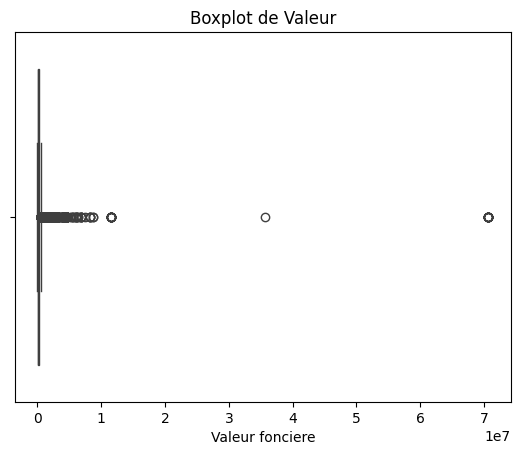

In [14]:
sns.boxplot(x=chunk['Valeur fonciere'])
plt.title('Boxplot de Valeur')
plt.show()

In [19]:

# Calculer la moyenne et l'écart-type
mean = chunk['Valeur fonciere'].mean()
std_dev = chunk['Valeur fonciere'].std()

# Définir les seuils pour les valeurs aberrantes
threshold = 3  # Par exemple, 3 écarts-types
lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

# Détecter les valeurs aberrantes
outliers = chunk[(chunk['Valeur fonciere'] < lower_bound) | (chunk['Valeur fonciere'] > upper_bound)]
print(outliers, std_dev, mean)

      Date mutation Nature mutation  Valeur fonciere Type de voie Code postal  \
3160     2023-01-21           Vente        8750000.0          RUE        1210   
3161     2023-01-21           Vente        8750000.0          RUE        1210   
6019     2023-01-31           Vente        6000000.0          NaN        1170   
6020     2023-01-31           Vente        6000000.0          NaN        1170   
6021     2023-01-31           Vente        6000000.0          NaN        1170   
...             ...             ...              ...          ...         ...   
87183    2023-07-10           Vente        4673000.0          RUE        3200   
87184    2023-07-10           Vente        4673000.0          RUE        3200   
87185    2023-07-10           Vente        4673000.0          RUE        3200   
87186    2023-07-10           Vente        4673000.0          RUE        3200   
87187    2023-07-10           Vente        4673000.0          RUE        3200   

       Nombre de lots  Code

In [21]:
from scipy import stats
# Calculer le Z-score
df=chunk.copy()
df['z_score'] = stats.zscore(df['Valeur fonciere'])
outliers = df[df['z_score'].abs() > 3]  # Seuil de 3
print(outliers)

      Date mutation Nature mutation  Valeur fonciere Type de voie Code postal  \
3160     2023-01-21           Vente        8750000.0          RUE        1210   
3161     2023-01-21           Vente        8750000.0          RUE        1210   
6019     2023-01-31           Vente        6000000.0          NaN        1170   
6020     2023-01-31           Vente        6000000.0          NaN        1170   
6021     2023-01-31           Vente        6000000.0          NaN        1170   
...             ...             ...              ...          ...         ...   
87183    2023-07-10           Vente        4673000.0          RUE        3200   
87184    2023-07-10           Vente        4673000.0          RUE        3200   
87185    2023-07-10           Vente        4673000.0          RUE        3200   
87186    2023-07-10           Vente        4673000.0          RUE        3200   
87187    2023-07-10           Vente        4673000.0          RUE        3200   

       Nombre de lots  Code

In [36]:
chunk.dtypes


date_mutation                datetime64[ns]
nature_mutation                      object
valeur_fonciere                     float64
type_de_voie                         object
code_postal                          object
nombre_de_lots                        int64
code_type_local                       int64
surface_reelle_bati                 float64
nombre_pieces_principales           float64
surface_terrain                     float64
somme_surface_carrez                float64
dtype: object

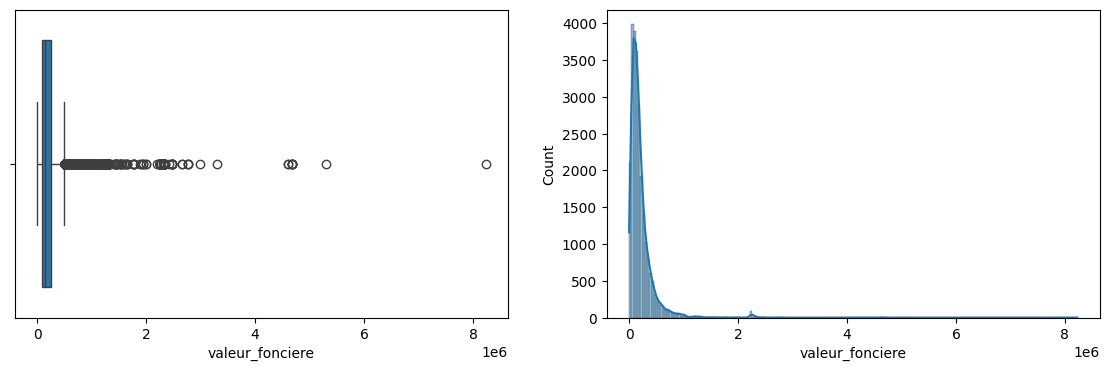

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=chunk, x='valeur_fonciere')
plt.subplot(1,2,2)
sns.histplot(chunk['valeur_fonciere'], bins=200,kde = True);
#robust

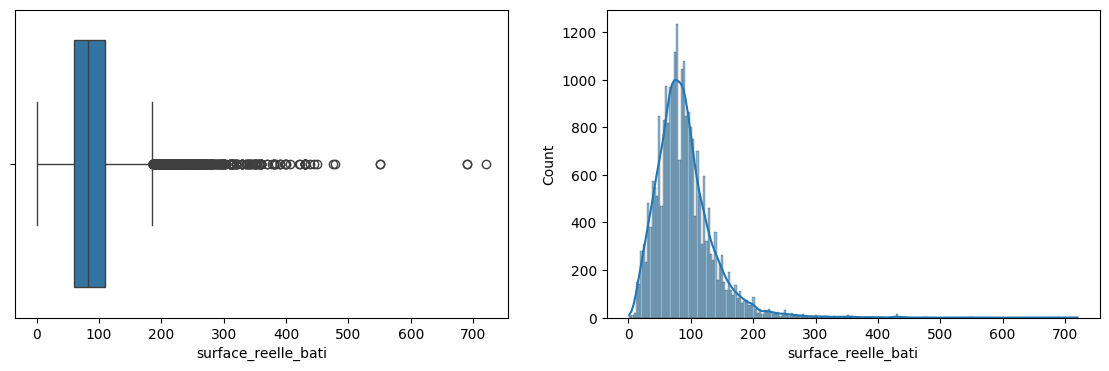

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=chunk, x='surface_reelle_bati')
plt.subplot(1,2,2)
sns.histplot(chunk['surface_reelle_bati'], bins=200,kde = True);
#standard

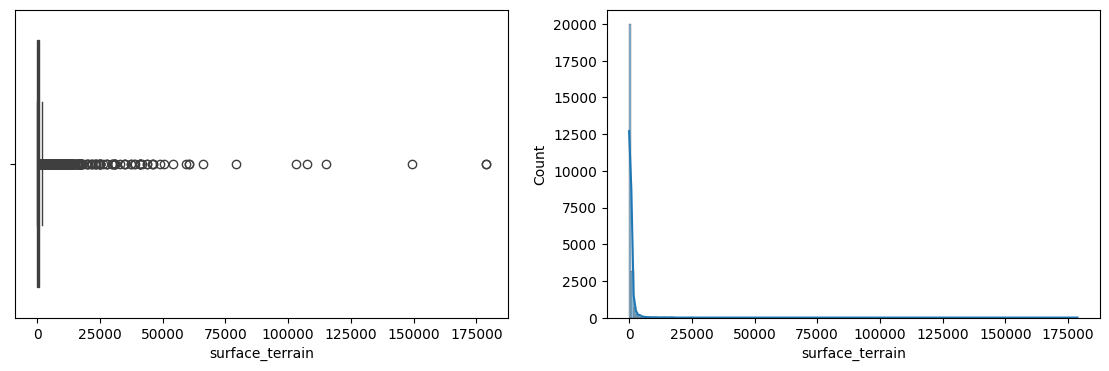

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=chunk, x='surface_terrain')
plt.subplot(1,2,2)
sns.histplot(chunk['surface_terrain'], bins=200,kde = True);
#robust

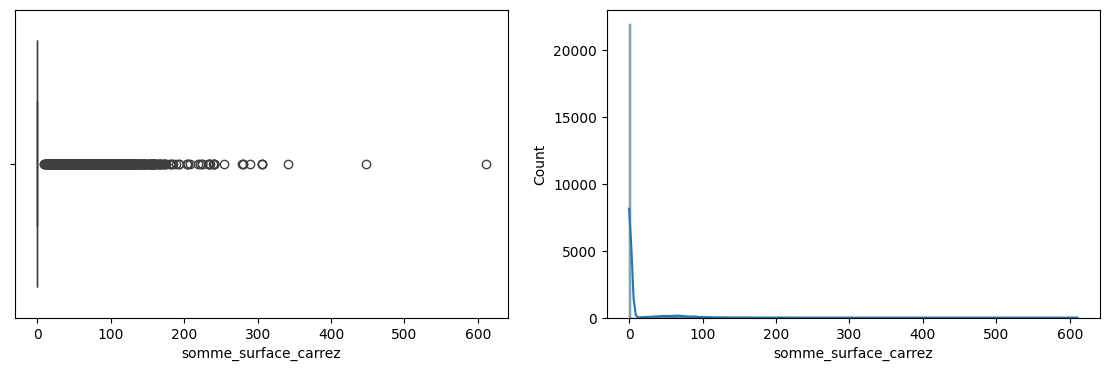

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=chunk, x='somme_surface_carrez')
plt.subplot(1,2,2)
sns.histplot(chunk['somme_surface_carrez'], bins=200,kde = True);
#robust

In [ ]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(),
    MinMaxScaler()
)

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", drop="if_binary")
)

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder="drop"
)

preproc_baseline

,date_mutation,valeur_fonciere,type_de_voie,code_postal,nombre_de_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,somme_surface_carrez
3,2023-01-03,152200.0,RTE,14500,0,1,64.0,3.0,988.0,0.00
4,2023-01-05,269000.0,CHE,18000,0,1,73.0,3.0,835.0,0.00
7,2023-01-03,770000.0,RUE,12100,0,1,136.0,7.0,921.0,0.00
14,2023-01-06,85520.0,CHE,13400,0,1,160.0,5.0,0.0,0.00
16,2023-01-04,335000.0,RUE,11300,0,1,106.0,6.0,1500.0,0.00
17,2023-01-04,335000.0,RUE,11300,0,1,106.0,6.0,778.0,0.00
20,2023-01-04,209000.0,AV,10000,2,2,68.0,3.0,0.0,0.00
22,2023-01-03,325000.0,NaN,11400,0,1,70.0,4.0,403.0,0.00
29,2023-01-04,430000.0,CHE,11600,0,2,51.0,2.0,89.0,0.00
30,2023-01-04,430000.0,CHE,11600,0,2,51.0,3.0,89.0,0.00


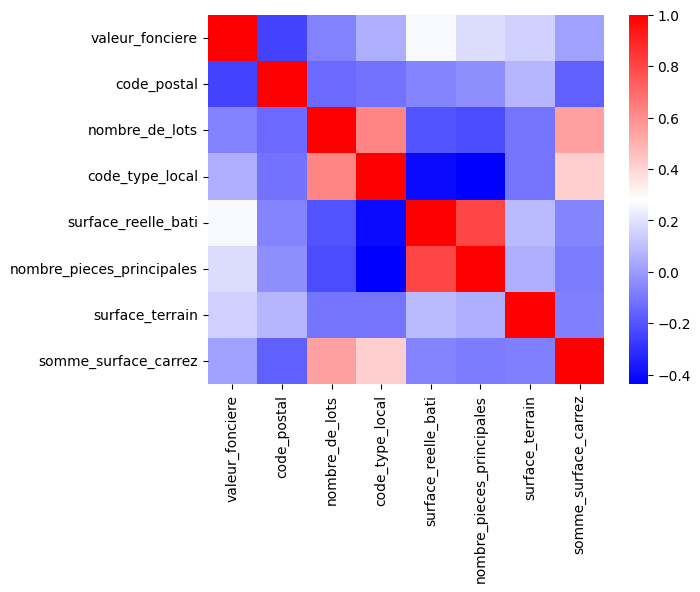

In [3]:
import pandas as pd
# Définir le nombre de lignes à lire
nrows = 100000
# Lire les premières 100 000 lignes du fichier
chunk = pd.read_csv("raw_data/valeursfoncieres-2023.txt", sep="|", nrows=nrows, dtype=str)
# Liste des colonnes d'intérêt
cols = ['Date mutation', 'Nature mutation', 'Valeur fonciere',
        'Type de voie', 'Code postal', 'Surface Carrez du 1er lot',
        'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot',
        'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot',
        'Nombre de lots', 'Code type local', 'Surface reelle bati',
        'Nombre pieces principales', 'Surface terrain']
chunk = chunk[cols]  # Sélectionner les colonnes
# Suppression des lignes qui n'ont pas de 'Valeur fonciere' ou de 'Code postal'
chunk.dropna(subset=['Valeur fonciere', 'Code postal'], inplace=True)
# Filtrer pour ne garder que les 'Vente' classiques
chunk = chunk[chunk['Nature mutation'] == 'Vente']
chunk = chunk[(chunk['Code type local'] == '1') | (chunk['Code type local'] == '2')]
chunk['Date mutation'] = pd.to_datetime(chunk['Date mutation'], format='%d/%m/%Y')
# Colonnes Carrez à traiter
carrez_cols = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot',
               'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot',
               'Surface Carrez du 5eme lot']
# Remplacer les virgules par des points dans les colonnes numériques
chunk['Valeur fonciere'] = chunk['Valeur fonciere'].str.replace(',', '.').astype(float)
chunk[carrez_cols] = chunk[carrez_cols].apply(lambda col: col.str.replace(',', '.').astype(float))
# Remplacer les NaN dans les colonnes Carrez par 0
chunk[carrez_cols] = chunk[carrez_cols].fillna(0)
chunk['somme surface carrez'] = chunk[carrez_cols].sum(axis=1)
# Supprimer les colonnes contenant les surfaces carrez
chunk.drop(columns=carrez_cols, inplace=True)
chunk[['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']] = chunk[['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']].fillna(0).astype(float)
chunk[['Nombre de lots', 'Code type local']] = chunk[['Nombre de lots', 'Code type local']].fillna(0).astype(int)
# Filtrer pour enlever les lignes où 'Nombre de lots', 'Surface reelle bati', ou 'somme surface carrez' sont égales à 0
chunk = chunk[(chunk['Nombre de lots'] != 0) |
              (chunk['Surface reelle bati'] != 0) |
              (chunk['somme surface carrez'] != 0)]
# Ajouter un zéro à la fin des codes postaux qui ont moins de 5 caractères
chunk['Code postal'] = chunk['Code postal'].astype(str).apply(lambda x: x + '0' * (5 - len(x)) if len(x) < 5 else x)
# Afficher les premières lignes pour vérifier
# chunk.head(20)
def clean_column_names(df):
    # Remplacer les majuscules par des minuscules et les espaces par des underscores
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df
# Clean du nom des colonnes
chunk = clean_column_names(chunk)
#### CORRELATION ####
import seaborn as sns
df_corr=chunk[['valeur_fonciere', 'code_postal','nombre_de_lots','code_type_local','surface_reelle_bati','nombre_pieces_principales','surface_terrain','somme_surface_carrez']]
# Heatmap of pairwise correlations
correlation_matrix = df_corr.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr")

#### Z-score #####
from scipy import stats
# Calculer le Z-score
df=chunk.copy()
df['z_score'] = stats.zscore(df['valeur_fonciere'])
outliers = df[df['z_score'].abs() > 3]  # Seuil de 3

#Remove outliers
chunk = df[df['z_score'].abs() <= 3]
#Drop z_score
chunk = chunk.drop('z_score', axis=1)

chunk[['code_type_local']] = chunk[['code_type_local']].astype(str)

chunk = chunk.drop('nature_mutation', axis=1)
chunk.head(20)

In [101]:
correlation_matrix['valeur_fonciere'].sort_values()

code_postal                 -0.248428
nombre_de_lots              -0.068152
somme_surface_carrez         0.014334
code_type_local              0.052530
surface_terrain              0.151036
nombre_pieces_principales    0.180148
surface_reelle_bati          0.258844
valeur_fonciere              1.000000
Name: valeur_fonciere, dtype: float64

In [102]:
chunk.dtypes

date_mutation                datetime64[ns]
valeur_fonciere                     float64
type_de_voie                         object
code_postal                          object
nombre_de_lots                        int64
code_type_local                      object
surface_reelle_bati                 float64
nombre_pieces_principales           float64
surface_terrain                     float64
somme_surface_carrez                float64
dtype: object

In [111]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

X_sans_D = chunk.drop(columns=['valeur_fonciere','date_mutation']).copy()
y = chunk.valeur_fonciere.copy()
feat_categorical = X.select_dtypes(include='object').columns
feat_categorical.shape

(3,)

In [106]:
preproc_robust = make_pipeline(
    #SimpleImputer(),
    #MinMaxScaler()
    RobustScaler()
)
preproc_standard = make_pipeline(
    #SimpleImputer(),
    #MinMaxScaler()
    StandardScaler()
)
preproc_categorical_baseline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

preproc_baseline = make_column_transformer(
    (preproc_standard,['surface_reelle_bati']),
    (preproc_robust, ['nombre_pieces_principales','surface_terrain','somme_surface_carrez']),
    (preproc_categorical_baseline, ['code_type_local','type_de_voie']),
    remainder="passthrough"
)

preproc_baseline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['surface_reelle_bati']),
                                ('pipeline-2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['nombre_pieces_principales',
                                  'surface_terrain', 'somme_surface_carrez']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['code_type_local', 'type_de_voie'])])

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
import pandas as pd

# Définir les pipelines de prétraitement
preproc_robust = make_pipeline(RobustScaler())
preproc_standard = make_pipeline(StandardScaler())
preproc_categorical_baseline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# Définir le transformer de colonnes
preproc_baseline = make_column_transformer(
    (preproc_standard, ['surface_reelle_bati']),
    (preproc_robust, ['surface_terrain', 'somme_surface_carrez','valeur_fonciere']),
    (preproc_categorical_baseline, ['code_type_local', 'type_de_voie']),
    remainder='passthrough'
)

# Préparer les données
X = chunk.drop(columns=['date_mutation']).copy()
y = chunk.valeur_fonciere.copy()

# Transformer les données
X_trans = preproc_baseline.fit_transform(X)

# Fonction pour obtenir les noms des colonnes
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            # Obtenir les noms de fonctionnalités pour chaque transformeur
            feature_names.extend(transformer.get_feature_names_out())
        else:
            feature_names.extend(columns)
    return feature_names

# Obtenir les noms des colonnes
feature_names = get_feature_names(preproc_baseline)

# Convertir en DataFrame si la sortie est une matrice creuse
if hasattr(X_trans, "toarray"):
    X_trans_dense = X_trans.toarray()
else:
    X_trans_dense = X_trans

# Créer la DataFrame avec les noms de colonnes
X_trans_df = pd.DataFrame(X_trans_dense, columns=feature_names)


# Ajouter la nouvelle colonne au début du DataFrame
X_trans_df.insert(0, 'date_mutation',chunk['date_mutation'].values)
# Afficher les premières lignes
X_trans_df.head(20)

,date_mutation,surface_reelle_bati,surface_terrain,somme_surface_carrez,valeur_fonciere,code_type_local_1,code_type_local_2,type_de_voie_ALL,type_de_voie_AV,type_de_voie_BD,...,type_de_voie_TRA,type_de_voie_VC,type_de_voie_VCHE,type_de_voie_VGE,type_de_voie_VLA,type_de_voie_VOIE,type_de_voie_nan,code_postal,nombre_de_lots,nombre_pieces_principales
0,2023-01-03,-0.546641,0.948622,0.00,0.026006,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14500.0,0.0,3.0
1,2023-01-05,-0.349126,0.720774,0.00,0.749226,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000.0,0.0,3.0
2,2023-01-03,1.033479,0.848846,0.00,3.851393,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12100.0,0.0,7.0
3,2023-01-06,1.560186,-0.522710,0.00,-0.386873,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13400.0,0.0,5.0
4,2023-01-04,0.375096,1.711095,0.00,1.157895,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11300.0,0.0,6.0
5,2023-01-04,0.375096,0.635890,0.00,1.157895,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11300.0,0.0,6.0
6,2023-01-04,-0.458857,-0.522710,0.00,0.377709,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,3.0
7,2023-01-03,-0.414964,0.077439,0.00,1.095975,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11400.0,0.0,4.0
8,2023-01-04,-0.831941,-0.390171,0.00,1.746130,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11600.0,0.0,2.0
9,2023-01-04,-0.831941,-0.390171,0.00,1.746130,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11600.0,0.0,3.0


In [11]:
correlation_matrix = X_trans_df.corr()
X_corr=X_trans_df.drop(columns='valeur_fonciere').copy()
X_corr=X_corr.corr()
#column_names = correlation_matrix.columns
#sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr")
#print(correlation_matrix.abs())
#print(X_corr['nombre_pieces_principales'].abs().sort_values(ascending=False))